In [6]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
import matplotlib.image as mping
import numpy as np
import urllib.request
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#/content/dataset_bali.zip
training_dir = '/content/drive/MyDrive/Capstone/dataset_newfix'

training_datagen = ImageDataGenerator(rescale=1./255,
                                      validation_split=0.2
                                      )

#vall_datagen = ImageDataGenerator(rescale=1 / 255)

train_generator= training_datagen.flow_from_directory(
        training_dir,
        target_size=(150, 150),
        batch_size=64,
        class_mode='categorical',
        subset = 'training'
    )

vall_generator = training_datagen.flow_from_directory(
        training_dir,
        target_size=(150, 150),
        batch_size=64,
        class_mode='categorical',
        subset = 'validation'
    )

Found 4032 images belonging to 55 classes.
Found 982 images belonging to 55 classes.


In [4]:

model=tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      # The second convolution
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      # The third convolution
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      # The fourth convolution
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      # The fifth convolution
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      # Flatten the results to feed into a DNN
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
      tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
      # YOUR CODE HERE, end with a Neuron Dense, activated by sigmoid
      tf.keras.layers.Dense(55, activation='softmax')
      ])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

model.fit(
        train_generator,
        validation_data=vall_generator,
        epochs=35,
    )

Epoch 1/35
63/63 [==============================] - 2922s 46s/step - loss: 7.2214 - accuracy: 0.0672 - val_loss: 3.8377 - val_accuracy: 0.2108
Epoch 2/35
63/63 [==============================] - 107s 2s/step - loss: 2.9124 - accuracy: 0.3733 - val_loss: 2.2747 - val_accuracy: 0.5244
Epoch 3/35
63/63 [==============================] - 107s 2s/step - loss: 2.0929 - accuracy: 0.5635 - val_loss: 1.8185 - val_accuracy: 0.6191
Epoch 4/35
63/63 [==============================] - 107s 2s/step - loss: 1.7483 - accuracy: 0.6434 - val_loss: 1.6259 - val_accuracy: 0.6395
Epoch 5/35
63/63 [==============================] - 102s 2s/step - loss: 1.5363 - accuracy: 0.6895 - val_loss: 1.4262 - val_accuracy: 0.6965
Epoch 6/35
63/63 [==============================] - 111s 2s/step - loss: 1.3815 - accuracy: 0.7287 - val_loss: 1.2802 - val_accuracy: 0.7230
Epoch 7/35
63/63 [==============================] - 103s 2s/step - loss: 1.2506 - accuracy: 0.7537 - val_loss: 1.1810 - val_accuracy: 0.7475
Epoch 8/35


Saving Screenshot 2023-12-13 170723.png to Screenshot 2023-12-13 170723 (1).png


NameError: ignored

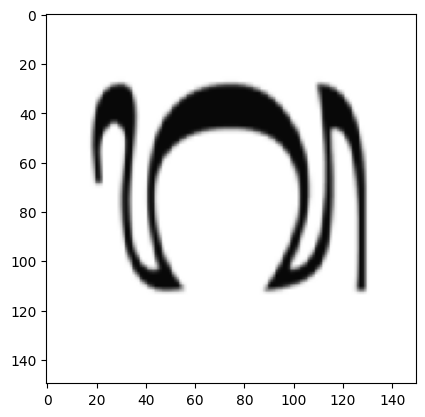

In [9]:
labels = {value: key for key, value in train_generator.class_indices.items()}

import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size = (150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 100)

  print(fn)

  class_list = labels

  for j in range(55):
    if classes[0][j] == 1.:
        print('This image belongs to class', class_list[j])
        break

In [19]:
model.save("path/save/model8980.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saving Screenshot 2023-12-13 113812.png to Screenshot 2023-12-13 113812.png
1/1 [==============================] - 0s 222ms/step
Screenshot 2023-12-13 113812.png
This image belongs to class Ta


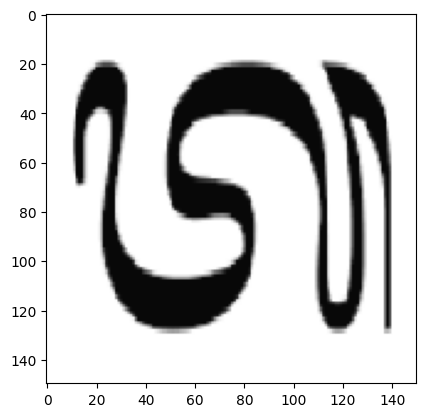

In [18]:
import numpy as np
from keras.preprocessing import image
from google.colab import files
from keras.models import load_model
import matplotlib.pyplot as plt

labels = {value: key for key, value in train_generator.class_indices.items()}

saved_model = load_model("model8980.h5")

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size = (150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = saved_model.predict(images, batch_size = 100)

  print(fn)

  class_list = labels

  for j in range(55):
    if classes[0][j] == 1.:
        print('This image belongs to class', class_list[j])
        break